<a href="https://colab.research.google.com/github/keinengott/MachineLearning/blob/main/CS4300.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Required Packages


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



# Load dataset and view first few rows

In [4]:
dataset = pd.read_csv('drive/MyDrive/diabetes-dataset.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [6]:
# Shows how many patients in the dataset have diabetes vs doesn't
dataset.Outcome.value_counts()

0    1316
1     684
Name: Outcome, dtype: int64

In [7]:
# Statistics summary
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


# Cleaning Data

There are no null collums, so we need to just look for values in the colums with no data





In [8]:
"""
 Zero pregnancies is beleivable, but I can't know if the 0 is because there was no data or if it was the actual number of pregnancies. 
 Technically newborns can have diabetes, but if there is any age 0's couples with pregnancies for instance, then that would be bad data
 so I check for it
"""
columnNames = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI', 'Age']
print(dataset[columnNames].isin({0}).sum())

Glucose           13
BloodPressure     90
SkinThickness    573
Insulin          956
BMI               28
Age                0
dtype: int64


In [9]:
# Age has no 0 values, so I will redefine columnNames to exclude it since I use it later
columnNames = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

Since we have some bad data, I will just set all nulls to the mean of the good data. We need to recompute means though since they are artificially low due to the 0 values

In [10]:
trueMeans = []
for col in columnNames:
  total = 0
  goodVal = 0
  for val in dataset[col]:
    total += val
    if val != 0:
      goodVal += 1
  trueMeans.append(total/goodVal)
print(trueMeans)

[121.97533970810267, 72.40366492146597, 29.34127540294324, 153.74329501915707, 32.650101419878276]


In [11]:
# dictionaries are easier to work with for me
meanDict = {}
index = 0
for col in columnNames:
  meanDict[col] = trueMeans[index]
  index += 1
print(meanDict)

{'Glucose': 121.97533970810267, 'BloodPressure': 72.40366492146597, 'SkinThickness': 29.34127540294324, 'Insulin': 153.74329501915707, 'BMI': 32.650101419878276}


In [12]:
for col in meanDict.keys():
  dataset[col] = dataset[col].replace({0 : meanDict[col]})

In [13]:
# Check for 0's again
print(dataset[columnNames].isin({0}).sum())

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


Look at document head again as sanity check

In [14]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.000000,35.000000,153.743295,33.6,0.127,47,1
1,0,84.0,82.000000,31.000000,125.000000,38.2,0.233,23,0
2,0,145.0,72.403665,29.341275,153.743295,44.2,0.630,31,1
3,0,135.0,68.000000,42.000000,250.000000,42.3,0.365,24,1
4,1,139.0,62.000000,41.000000,480.000000,40.7,0.536,21,0


In [15]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.975340,72.403665,29.341275,153.743295,32.650101,0.470930,33.090500,0.342000
std,3.306063,30.533114,11.949531,9.123652,80.376307,7.190136,0.323553,11.786423,0.474498
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,25.000000,120.000000,27.600000,0.244000,24.000000,0.000000
50%,3.000000,118.000000,72.000000,29.341275,153.743295,32.400000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,153.743295,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000



# Visualize cleaned Data

The following looks at the distribution of each feature

<Axes: >

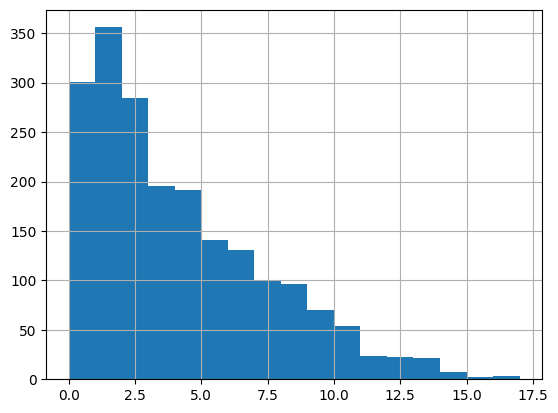

In [16]:
dataset.Pregnancies.hist(bins=17)

<Axes: >

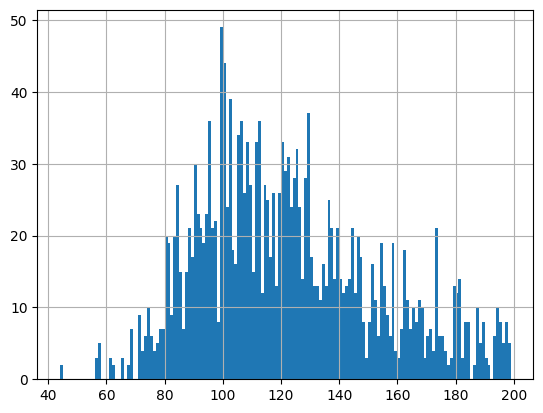

In [17]:
dataset.Glucose.hist(bins=199-44)

<Axes: >

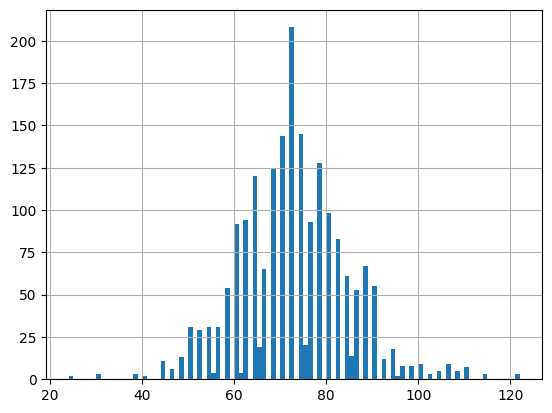

In [18]:
dataset.BloodPressure.hist(bins=122-24)

<Axes: >

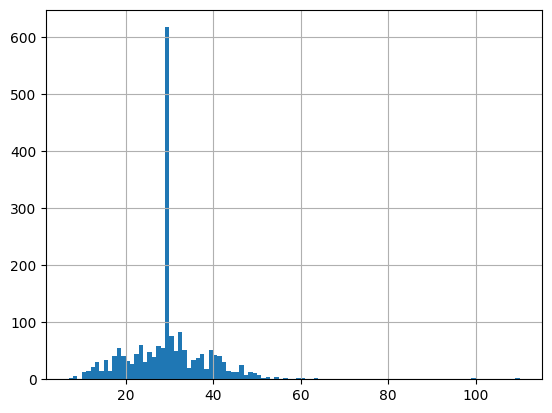

In [19]:
dataset.SkinThickness.hist(bins=110-7)

<Axes: >

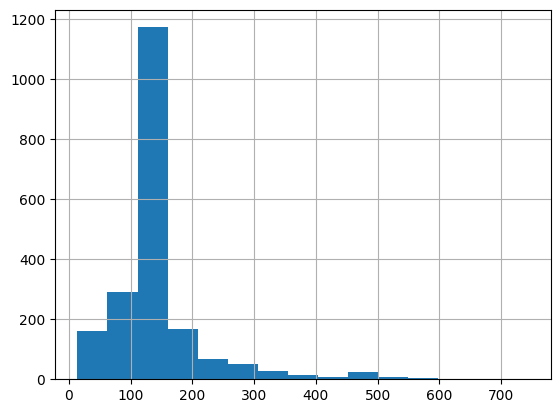

In [20]:
dataset.Insulin.hist(bins=15)

<Axes: >

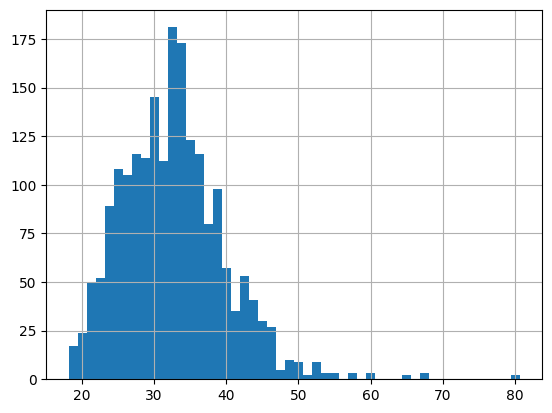

In [21]:
dataset.BMI.hist(bins=50)

<Axes: >

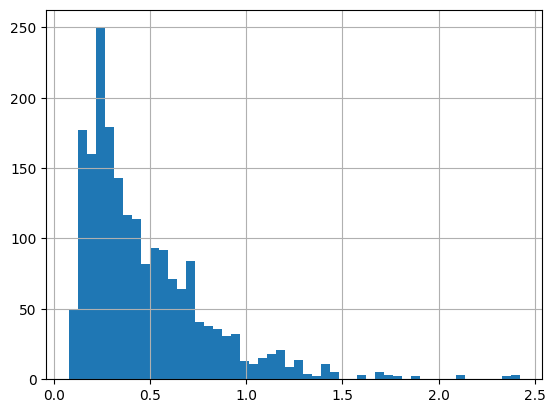

In [22]:
dataset.DiabetesPedigreeFunction.hist(bins=50)

<Axes: >

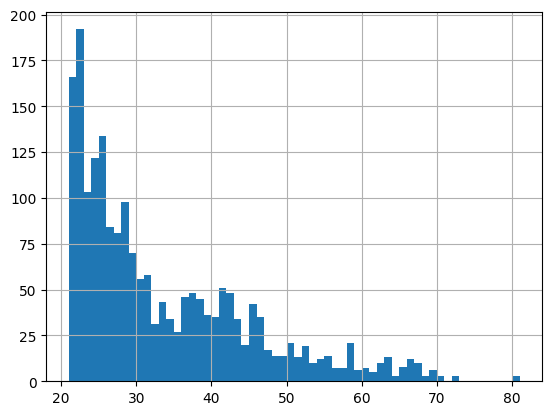

In [23]:
dataset.Age.hist(bins=60)

<Axes: >

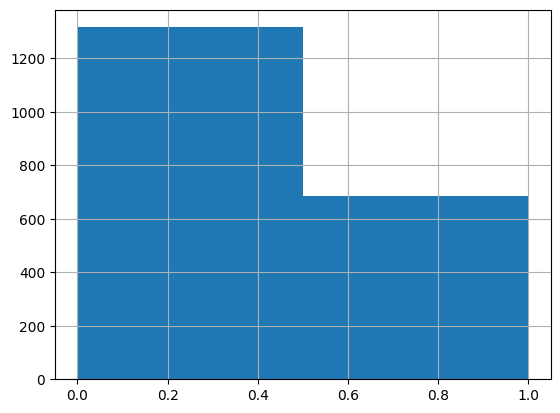

In [24]:
dataset.Outcome.hist(bins=2)

In [25]:
#drop duplicate data
dataset.drop_duplicates(inplace=True)
dataset.shape

(744, 9)

# Splitting Data into Training and Validation Sets

In [26]:
from sklearn.model_selection import train_test_split
features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI', 'DiabetesPedigreeFunction','Age']
prediction = ['Outcome']
X = dataset[features].values
Y = dataset[prediction].values

x_train, x_valid, y_train, y_valid = train_test_split(X, Y, test_size=.30, random_state=2)
print(X.shape)
print(Y.shape)

(744, 8)
(744, 1)


#Logistic Regression

In [27]:
#scaling for logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

scaler=StandardScaler()
scaled_df=scaler.fit_transform(dataset.drop('Outcome',axis=1))
scaled_df=pd.DataFrame(scaled_df,columns=dataset.drop('Outcome',axis=1).columns)
scaled_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.525812,0.536961,-0.852922,0.598155,0.000285,0.127823,-1.059497,1.180028
1,-1.125818,-1.243261,0.808327,0.171845,-0.354280,0.759079,-0.734305,-0.863675
2,-1.125818,0.767731,0.011232,-0.004937,0.000285,1.582456,0.483632,-0.182441
3,-1.125818,0.438060,-0.354548,1.344196,1.187667,1.321720,-0.329348,-0.778521
4,-0.825815,0.569928,-0.852922,1.237619,4.024849,1.102153,0.195254,-1.033984


In [28]:
#features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI', 'DiabetesPedigreeFunction','Age']
#prediction = ['Outcome']
X = scaled_df
Y = dataset.Outcome

x_train, x_valid, y_train, y_valid = train_test_split(X, Y, test_size=.30, random_state=2)

model_list=[]
model_f1_score=[]
model_accuracy_score=[]
lrModel=LogisticRegression(max_iter=1000)
lrModel.fit(x_train,y_train)

yhat_lm=lrModel.predict(x_valid)
lm_score=f1_score(y_valid,yhat_lm)
model_f1_score.append(lm_score)
lm_score
lm_accuracy=accuracy_score(y_valid,yhat_lm)
model_accuracy_score.append(lm_accuracy)
lm_accuracy

0.7410714285714286

In [29]:
print(classification_report(y_valid,yhat_lm))

              precision    recall  f1-score   support

           0       0.74      0.88      0.81       137
           1       0.74      0.52      0.61        87

    accuracy                           0.74       224
   macro avg       0.74      0.70      0.71       224
weighted avg       0.74      0.74      0.73       224



#Neural Network

In [30]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

a = ModelCheckpoint(filepath='drive/MyDrive/diabetesModel', monitor='val_loss', save_best_only=True)
b = EarlyStopping(monitor='val_accuracy', patience=20)
c = ReduceLROnPlateau(monitor='val_loss',factor=0.5, patience=10)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI', 'DiabetesPedigreeFunction','Age']
prediction = ['Outcome']
X = dataset[features].values
Y = dataset[prediction].values
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std
x_train, x_valid, y_train, y_valid = train_test_split(X, Y, test_size=.30, random_state=2)

model = Sequential()
model.add(Dense(64, input_dim = len(X[0, :]), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
print(len(model.layers))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 3,361
Trainable params: 3,361
Non-trainabl

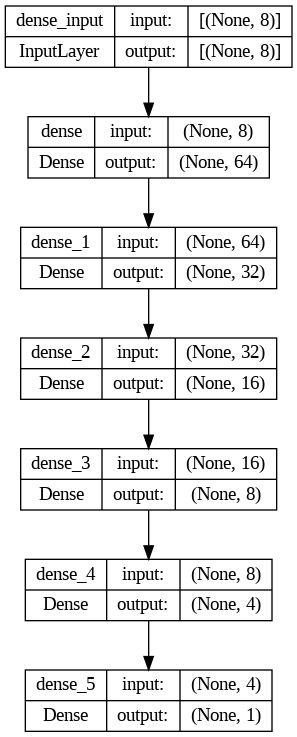

In [32]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_layer_names=True, show_shapes=True)

In [33]:
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs = 256, verbose = 1)

Epoch 1/256
17/17 [==============================] - 1s 3ms/step - loss: 0.6869 - accuracy: 0.6404
Epoch 2/256
17/17 [==============================] - 0s 4ms/step - loss: 0.6731 - accuracy: 0.7423
Epoch 3/256
17/17 [==============================] - 0s 4ms/step - loss: 0.6611 - accuracy: 0.7519
Epoch 4/256
17/17 [==============================] - 0s 4ms/step - loss: 0.6479 - accuracy: 0.7942
Epoch 5/256
17/17 [==============================] - 0s 3ms/step - loss: 0.6356 - accuracy: 0.7923
Epoch 6/256
17/17 [==============================] - 0s 3ms/step - loss: 0.6209 - accuracy: 0.8000
Epoch 7/256
17/17 [==============================] - 0s 3ms/step - loss: 0.6043 - accuracy: 0.8038
Epoch 8/256
17/17 [==============================] - 0s 4ms/step - loss: 0.5831 - accuracy: 0.8135
Epoch 9/256
17/17 [==============================] - 0s 4ms/step - loss: 0.5538 - accuracy: 0.8115
Epoch 10/256
17/17 [==============================] - 0s 3ms/step - loss: 0.5221 - accuracy: 0.8038
Epoch 11/

In [34]:
print ('True Validation Data:')
print(Y[:10])
prediction = model.predict(x_valid)
print ('Prediction:')
print(prediction[0:10].T)

True Validation Data:
[[1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
7/7 [==============================] - 0s 2ms/step
Prediction:
[[1.9314187e-11 4.3438544e-10 1.6917670e-04 3.3315484e-06 1.0161104e-03
  2.3068408e-03 5.8469705e-09 1.0000000e+00 1.7795872e-03 4.5346305e-06]]


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_valid, prediction.round())
precision = precision_score(y_valid, prediction.round())
recall = recall_score(y_valid, prediction.round())
f1score = f1_score(y_valid, prediction.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

Accuracy: 70.09%
Precision: 63.51%
Recall: 54.02%
F1-score: 0.58


#Data Analysis

In [36]:
layer8Info = {3 : 73.66, 4 : 74.55, 5 : 72.77, 6 : 76.79, 7 : 73.21, 8 : 67.41, 9 : 74.11, 10 : 73.66, 11 : 72.77, 12 : 69.20, 13 : 72.32}
layer16Info = {4 : 73.66, 5 : 75.00, 6 : 75.00, 7 : 73.21, 8 : 64.73, 9 : 68.3, 10 : 70.98, 11 : 69.20, 12 : 70.54, 13 : 64.29, 14 : 67.41}
layer32Info = {5 : 69.64, 6 : 69.2, 7 : 72.32, 8 : 71.43, 9 : 61.16, 10 : 71.88, 11 : 64.29, 12 : 68.3, 13 : 66.07, 14 : 69.64, 15 : 61.16}
layer64Info = {6 : 69.2, 7 : 71.43, 8 : 75.00, 9 : 75.89, 10 : 68.30, 11 : 69.20, 12 : 73.66, 13 : 70.54, 14 : 67.41, 15 : 71.43, 16 : 73.66, 17 : 61.16}
neuronInfo = {}

Text(0.5, 0, 'layers of 8 neurons')

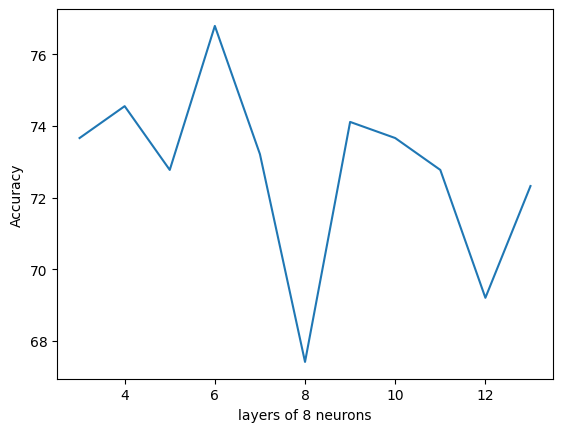

In [37]:
plt.plot(list(layer8Info.keys()), list(layer8Info.values()))
plt.ylabel('Accuracy')
plt.xlabel('layers of 8 neurons')

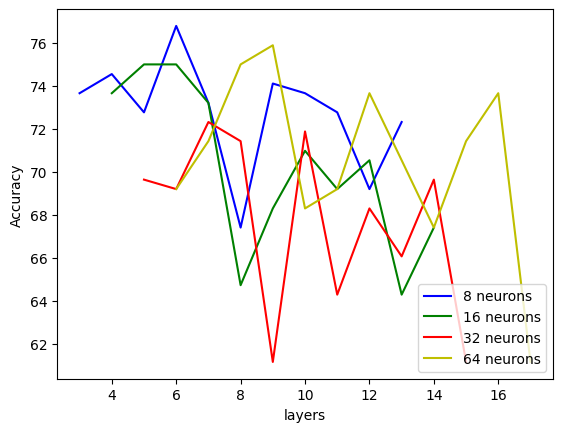

In [38]:
plt.plot(list(layer8Info.keys()), list(layer8Info.values()), 'b')
plt.plot(list(layer16Info.keys()), list(layer16Info.values()),'g')
plt.plot(list(layer32Info.keys()), list(layer32Info.values()),'r')
plt.plot(list(layer64Info.keys()), list(layer64Info.values()),'y')
plt.ylabel('Accuracy')
plt.xlabel('layers')
plt.legend(['8 neurons', '16 neurons', '32 neurons', '64 neurons'], loc='lower right')

#Trying out linear activation

In [39]:
model2 = Sequential()
model2.add(Dense(8, input_dim = len(X[0, :]), activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(4, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 72        
                                                                 
 dense_7 (Dense)             (None, 8)                 72        
                                                                 
 dense_8 (Dense)             (None, 4)                 36        
                                                                 
 dense_9 (Dense)             (None, 1)                 5         
                                                                 
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________


In [40]:
model2.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
history2 = model2.fit(x_train, y_train, validation_data = (x_valid, y_valid), epochs = 256, verbose = 1, callbacks=[b])

Epoch 1/256
17/17 [==============================] - 1s 16ms/step - loss: 0.7594 - accuracy: 0.5000 - val_loss: 0.6983 - val_accuracy: 0.5491
Epoch 2/256
17/17 [==============================] - 0s 5ms/step - loss: 0.7240 - accuracy: 0.5808 - val_loss: 0.6853 - val_accuracy: 0.5893
Epoch 3/256
17/17 [==============================] - 0s 4ms/step - loss: 0.7056 - accuracy: 0.6231 - val_loss: 0.6756 - val_accuracy: 0.6250
Epoch 4/256
17/17 [==============================] - 0s 5ms/step - loss: 0.6893 - accuracy: 0.6519 - val_loss: 0.6635 - val_accuracy: 0.6607
Epoch 5/256
17/17 [==============================] - 0s 5ms/step - loss: 0.6688 - accuracy: 0.6846 - val_loss: 0.6486 - val_accuracy: 0.6875
Epoch 6/256
17/17 [==============================] - 0s 5ms/step - loss: 0.6455 - accuracy: 0.7058 - val_loss: 0.6297 - val_accuracy: 0.6741
Epoch 7/256
17/17 [==============================] - 0s 4ms/step - loss: 0.6218 - accuracy: 0.7212 - val_loss: 0.6147 - val_accuracy: 0.6786
Epoch 8/256


In [41]:
prediction2 = model2.predict(x_valid)

7/7 [==============================] - 0s 2ms/step


In [42]:
accuracy2 = accuracy_score(y_valid, prediction2.round())
precision2 = precision_score(y_valid, prediction2.round())
recall2 = recall_score(y_valid, prediction2.round())
f1score2 = f1_score(y_valid, prediction2.round())
print("Accuracy: %.2f%%" % (accuracy2 * 100.0))
print("Precision: %.2f%%" % (precision2 * 100.0))
print("Recall: %.2f%%" % (recall2 * 100.0))
print("F1-score: %.2f" % (f1score2))

Accuracy: 73.21%
Precision: 70.77%
Recall: 52.87%
F1-score: 0.61


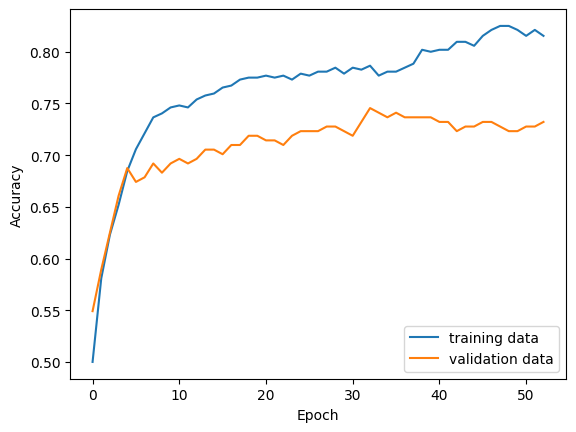

In [43]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

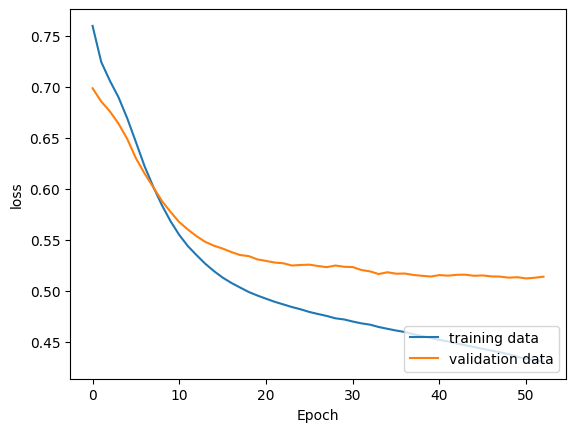

In [44]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [45]:
print(history2.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [46]:
model3 = Sequential()
model3.add(Dense(8, input_dim = len(X[0, :]), activation='linear'))
model3.add(Dense(8, activation='linear'))
model3.add(Dense(4, activation='linear'))
model3.add(Dense(1, activation='linear'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 8)                 72        
                                                                 
 dense_11 (Dense)            (None, 8)                 72        
                                                                 
 dense_12 (Dense)            (None, 4)                 36        
                                                                 
 dense_13 (Dense)            (None, 1)                 5         
                                                                 
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________


In [47]:
model3.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
history3 = model3.fit(x_train, y_train, validation_data = (x_valid, y_valid), epochs = 256, verbose = 1, callbacks=[])

Epoch 1/256
17/17 [==============================] - 1s 21ms/step - loss: 3.2972 - accuracy: 0.7346 - val_loss: 3.7160 - val_accuracy: 0.6875
Epoch 2/256
17/17 [==============================] - 0s 6ms/step - loss: 3.3095 - accuracy: 0.7385 - val_loss: 3.9331 - val_accuracy: 0.6920
Epoch 3/256
17/17 [==============================] - 0s 6ms/step - loss: 3.2426 - accuracy: 0.7404 - val_loss: 3.7759 - val_accuracy: 0.6830
Epoch 4/256
17/17 [==============================] - 0s 7ms/step - loss: 3.2009 - accuracy: 0.7385 - val_loss: 3.7769 - val_accuracy: 0.6920
Epoch 5/256
17/17 [==============================] - 0s 6ms/step - loss: 3.1984 - accuracy: 0.7423 - val_loss: 3.7723 - val_accuracy: 0.6920
Epoch 6/256
17/17 [==============================] - 0s 8ms/step - loss: 3.1701 - accuracy: 0.7462 - val_loss: 3.7079 - val_accuracy: 0.7054
Epoch 7/256
17/17 [==============================] - 0s 6ms/step - loss: 3.1492 - accuracy: 0.7500 - val_loss: 3.7173 - val_accuracy: 0.6964
Epoch 8/256


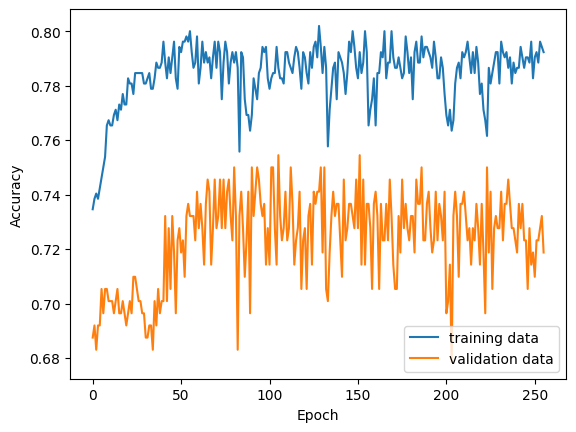

In [48]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

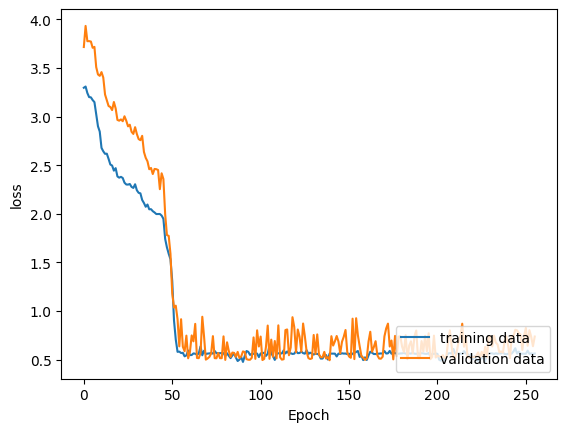

In [49]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [50]:
prediction3 = model3.predict(x_valid)
accuracy3 = accuracy_score(y_valid, prediction3.round())
precision3 = precision_score(y_valid, prediction3.round(), average="weighted")
recall3 = recall_score(y_valid, prediction3.round(), average="weighted")
f1score3 = f1_score(y_valid, prediction3.round(), average="weighted")
print("Accuracy: %.2f%%" % (accuracy3 * 100.0))
print("Precision: %.2f%%" % (precision3 * 100.0))
print("Recall: %.2f%%" % (recall3 * 100.0))
print("F1-score: %.2f" % (f1score3))

7/7 [==============================] - 0s 2ms/step
Accuracy: 71.43%
Precision: 71.17%
Recall: 71.43%
F1-score: 0.71


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Feature Removal

In [51]:
features = [['Glucose'],
            ['BMI'],
            ['Age'],
            ['BloodPressure'],
            ['Pregnancies'],
            ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI', 'DiabetesPedigreeFunction','Age'],
            ['Glucose','BloodPressure','SkinThickness','Insulin','BMI', 'DiabetesPedigreeFunction','Age'],
            ['Pregnancies','BloodPressure','SkinThickness','Insulin','BMI', 'DiabetesPedigreeFunction','Age'],
            ['Pregnancies','Glucose','SkinThickness','Insulin','BMI', 'DiabetesPedigreeFunction','Age'],
            ['Pregnancies','Glucose','BloodPressure','Insulin','BMI', 'DiabetesPedigreeFunction','Age'],
            ['Pregnancies','Glucose','BloodPressure','SkinThickness','BMI', 'DiabetesPedigreeFunction','Age'],
            ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','DiabetesPedigreeFunction','Age'],
            ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age'],
            ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI', 'DiabetesPedigreeFunction'],
            ['Pregnancies','Glucose','Insulin','BMI', 'DiabetesPedigreeFunction','Age'],
            ['Pregnancies','Glucose','Insulin','BMI','Age'],
            ['Glucose','BloodPressure'],
            ['Pregnancies','Glucose','BloodPressure','Insulin','BMI','Age'],
            ['Glucose','Insulin','BMI','Age'],
            ['Glucose', 'BMI', 'Age'],
            ['Glucose', 'BMI']]
prediction = ['Outcome']
histories = []
predictions = []
for i in range(len(features)):
  print(features[i])
  X = (dataset[features[i]].values).astype(float)
  Y = dataset[prediction].values
  mean = X.mean(axis=0)
  X -= mean
  std = X.std(axis=0)
  X /= std
  x_train, x_valid, y_train, y_valid = train_test_split(X, Y, test_size=.30, random_state=2)
  model = Sequential()
  model.add(Dense(8, input_dim = len(X[0, :]), activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(4, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
  history = model.fit(x_train, y_train, validation_data = (x_valid, y_valid), epochs = 256, verbose = 0, callbacks=[b])
  histories.append(history)
  predictions.append(model.predict(x_valid))
print("done.")

['Glucose']
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
7/7 [==============================] - 0s 2ms/step
['BMI']
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
7/7 [==============================] - 0s 2ms/step
['Age']
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
7/7 [==============================] - 0s 3ms/step
['BloodPressure']
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
7/7 [==============================] - 0s 3ms/step
['Pregnancies']
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
7/7 [==============================] - 0s 3ms/step
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
7/7 [==============================] - 0s 2ms/step
['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
7/7 [==============================] - 0s 2ms/step
['Pregnancies', 'BloodPressure',

In [52]:
data =[]
index = 0
for p in predictions:
  print(features[index])
  accuracy = accuracy_score(y_valid, p.round())
  precision = precision_score(y_valid, p.round(),zero_division=False, average="weighted")
  recall = recall_score(y_valid, p.round(), average="weighted")
  f1score = f1_score(y_valid, p.round(), average="weighted")
  data.append([accuracy, precision, recall, f1score])
  print("Accuracy: %.2f%%" % (accuracy * 100.0))
  print("Precision: %.2f%%" % (precision * 100.0))
  print("Recall: %.2f%%" % (recall * 100.0))
  print("F1-score: %.2f\n" % (f1score))
  index += 1

['Glucose']
Accuracy: 70.98%
Precision: 70.55%
Recall: 70.98%
F1-score: 0.70

['BMI']
Accuracy: 61.16%
Precision: 37.41%
Recall: 61.16%
F1-score: 0.46

['Age']
Accuracy: 61.16%
Precision: 37.41%
Recall: 61.16%
F1-score: 0.46

['BloodPressure']
Accuracy: 61.16%
Precision: 37.41%
Recall: 61.16%
F1-score: 0.46

['Pregnancies']
Accuracy: 61.16%
Precision: 37.41%
Recall: 61.16%
F1-score: 0.46

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Accuracy: 70.54%
Precision: 69.96%
Recall: 70.54%
F1-score: 0.69

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Accuracy: 74.55%
Precision: 74.31%
Recall: 74.55%
F1-score: 0.74

['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Accuracy: 61.16%
Precision: 37.41%
Recall: 61.16%
F1-score: 0.46

['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age

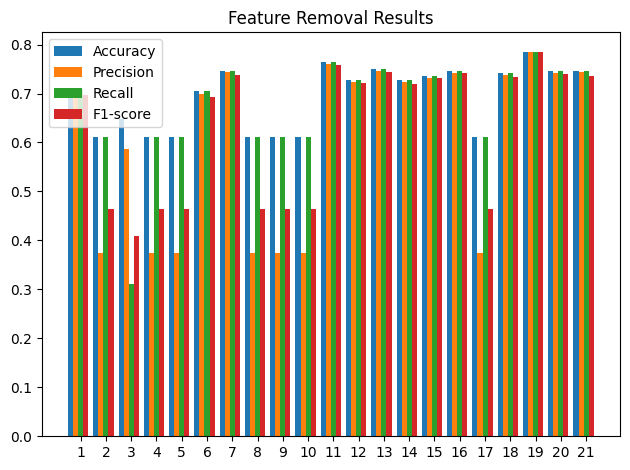

<Figure size 600x400 with 0 Axes>

In [53]:
data[2]=[.6473,.587,.3103,.41] # Replacing bad data with data from previous run of same type
x = np.arange(len(data))
labels =[str(i+1) for i in range(len(data))]
fig, ax = plt.subplots()
width = 0.20  # the width of the bars

rects1 = ax.bar(x - 2*width, [i[0] for i in data], width, label='Accuracy')
rects2 = ax.bar(x - width, [i[1] for i in data], width, label='Precision')
rects3 = ax.bar(x + 0, [i[2] for i in data], width, label='Recall')
rects4 = ax.bar(x + width, [i[3] for i in data], width, label='F1-score')
ax.set_title('Feature Removal Results')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.figure(figsize=(6,4))
fig.tight_layout()

plt.show()

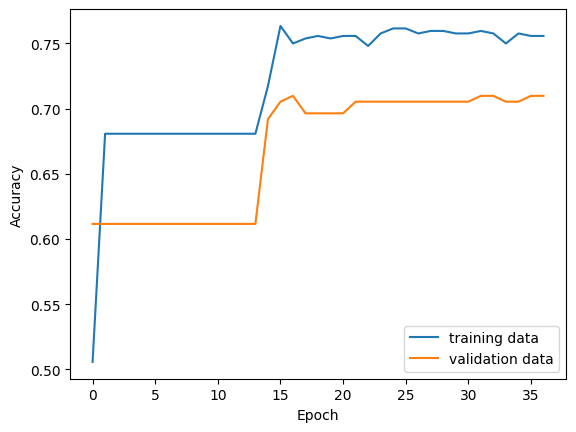

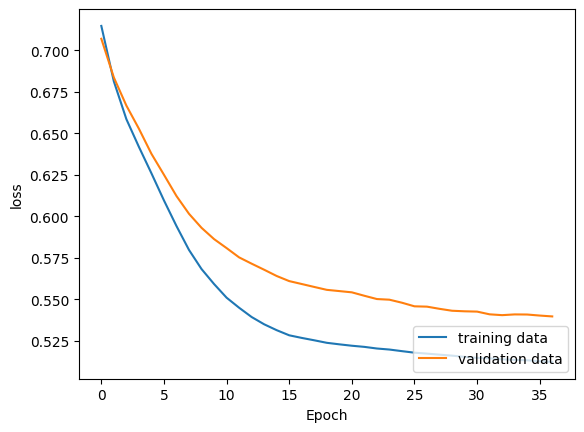

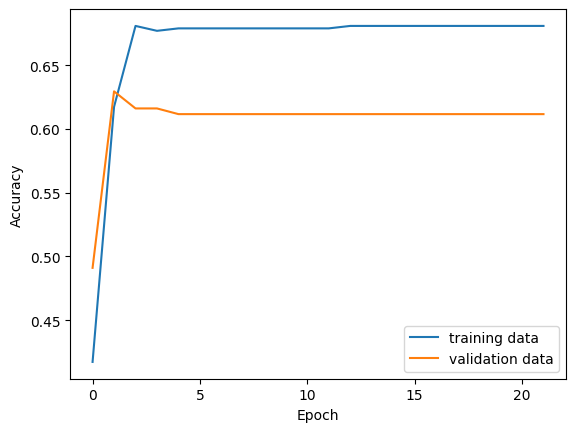

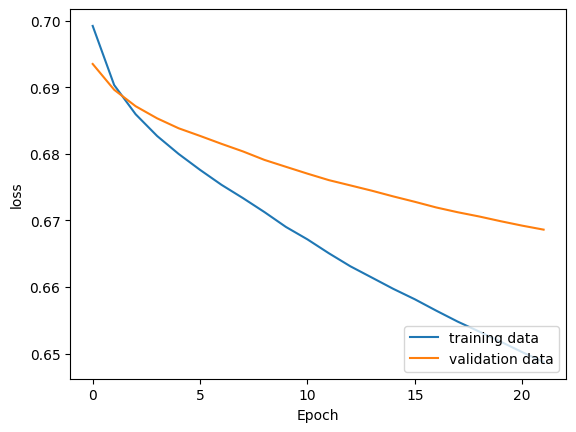

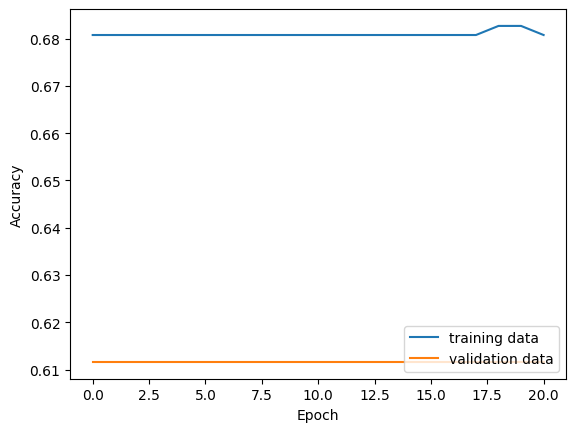

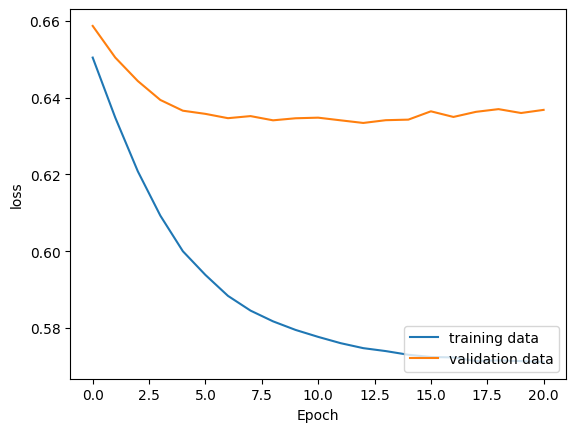

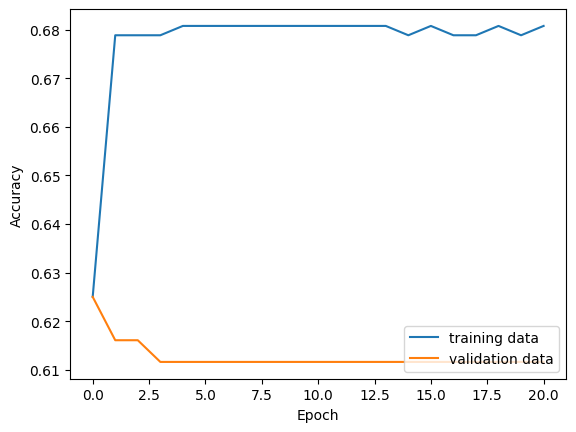

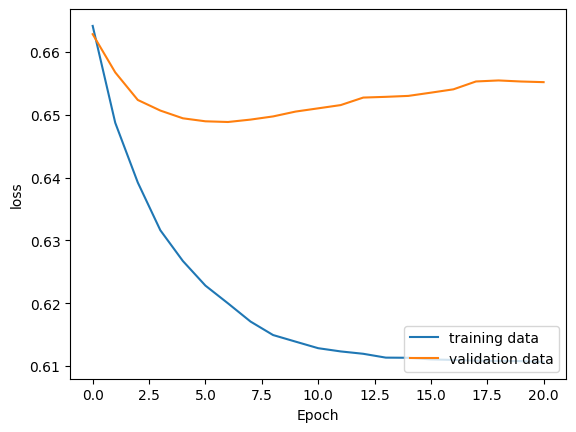

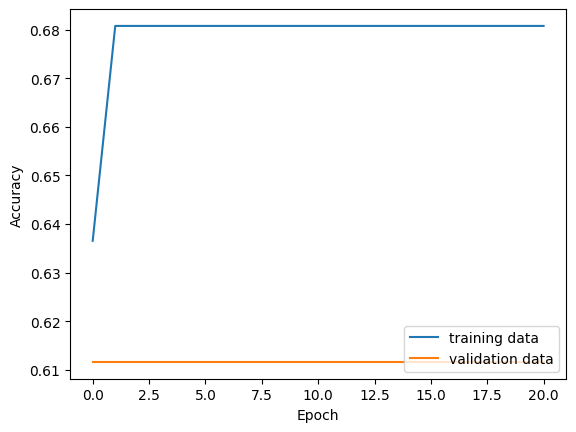

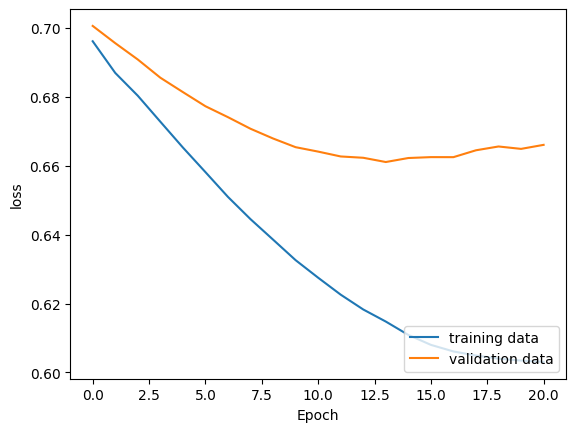

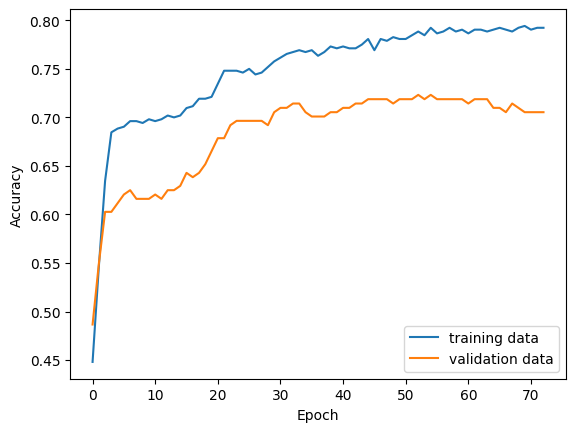

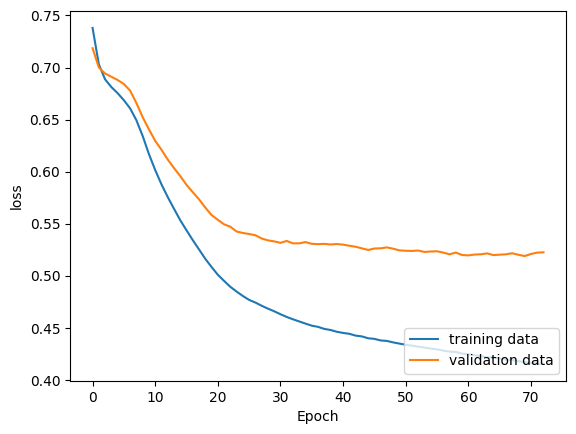

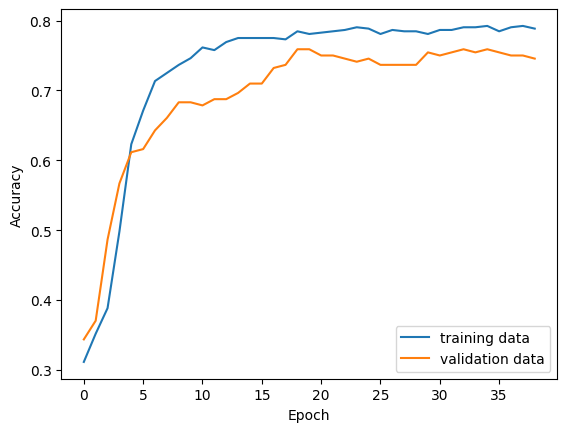

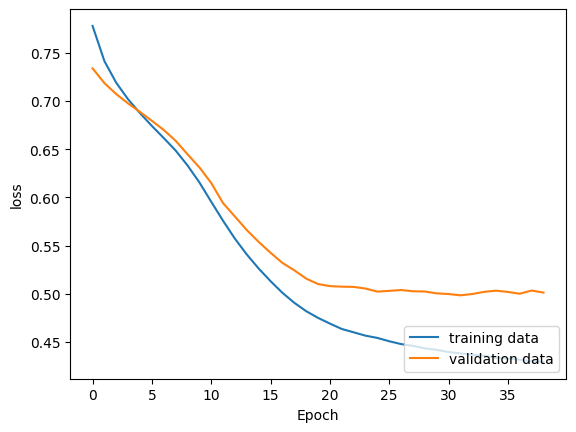

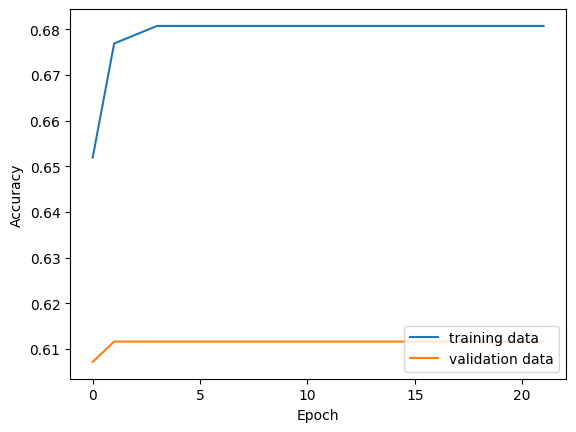

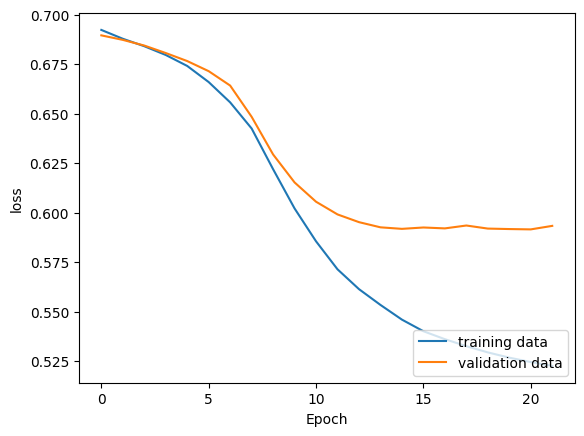

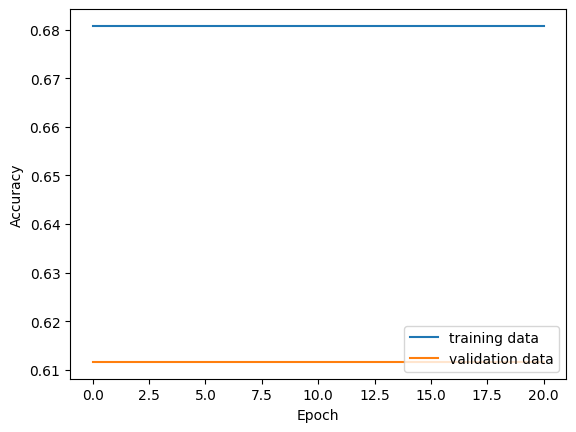

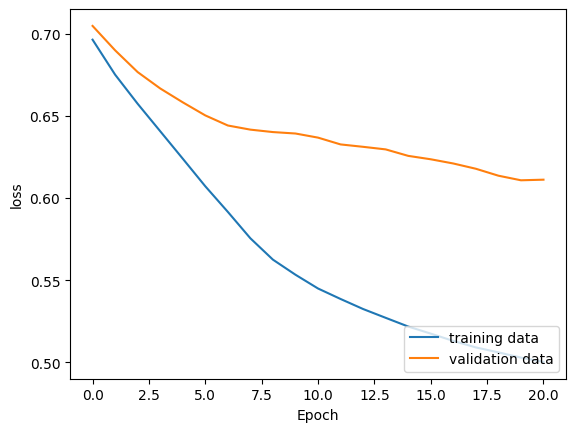

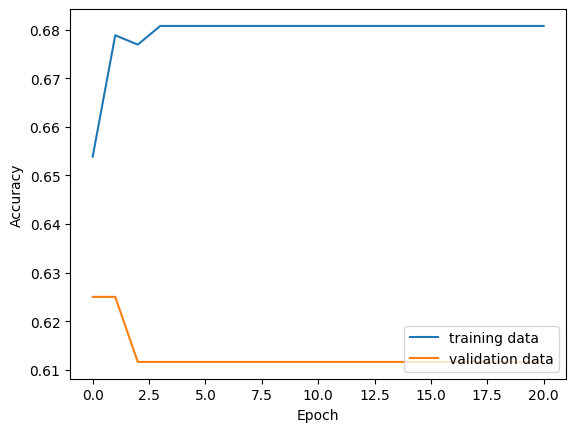

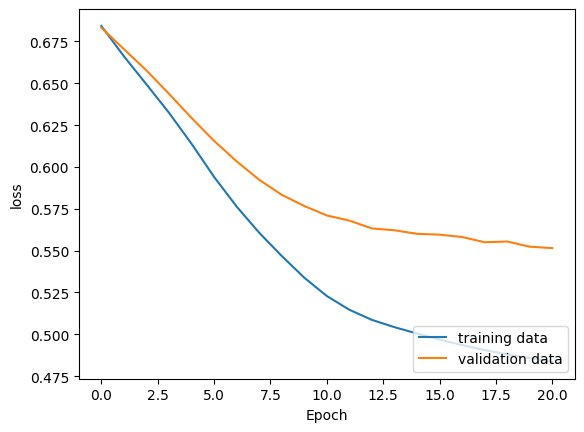

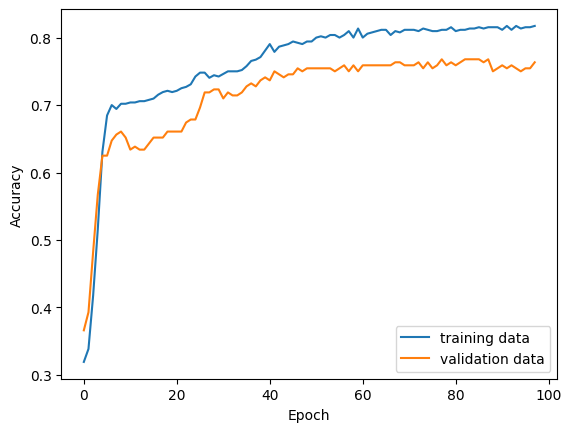

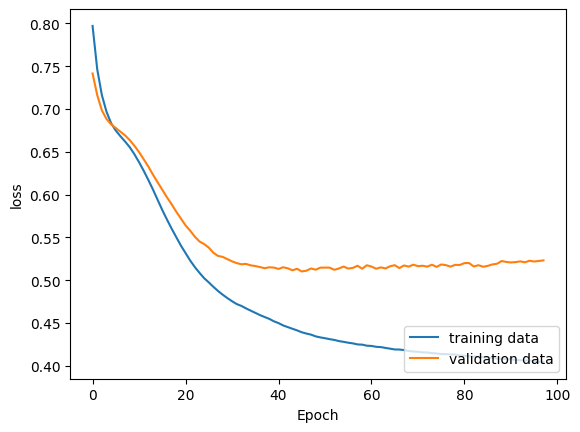

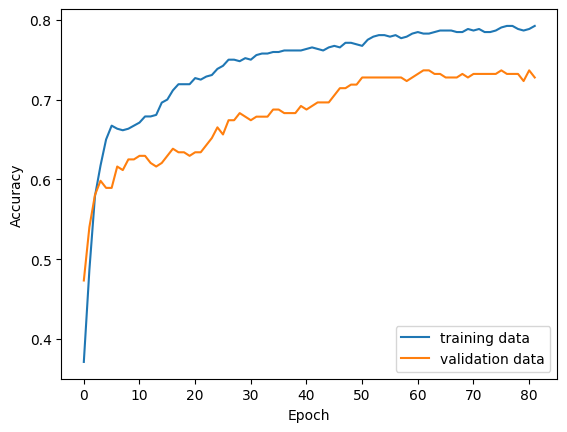

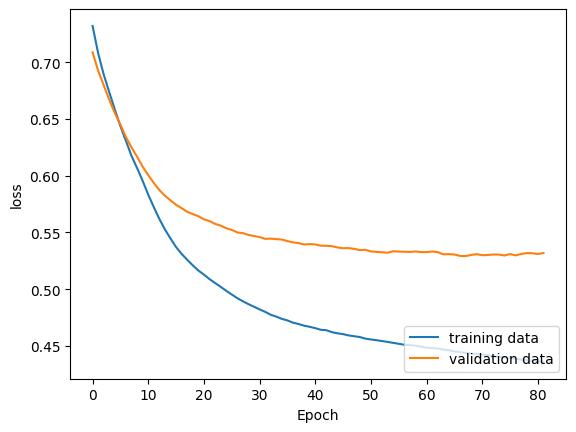

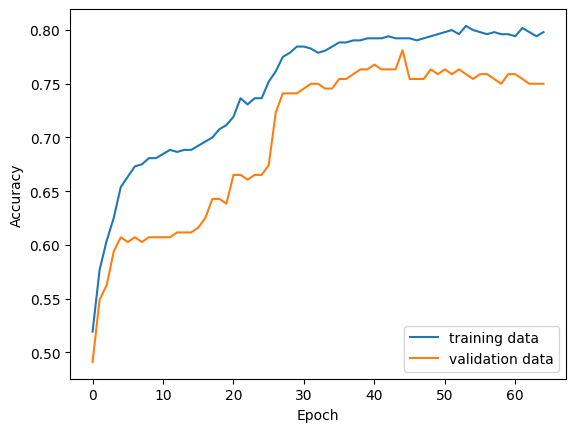

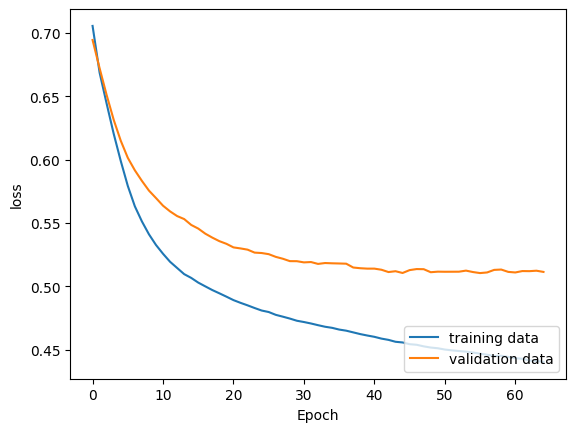

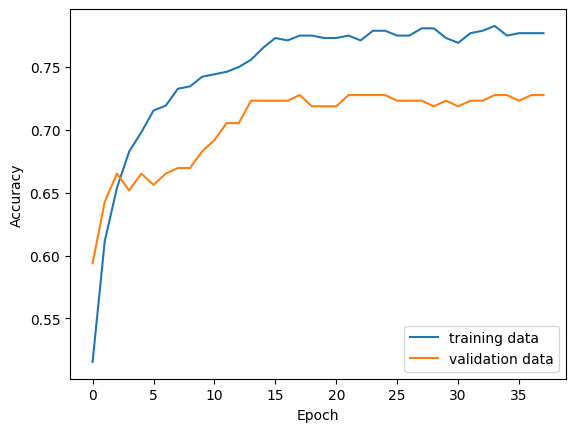

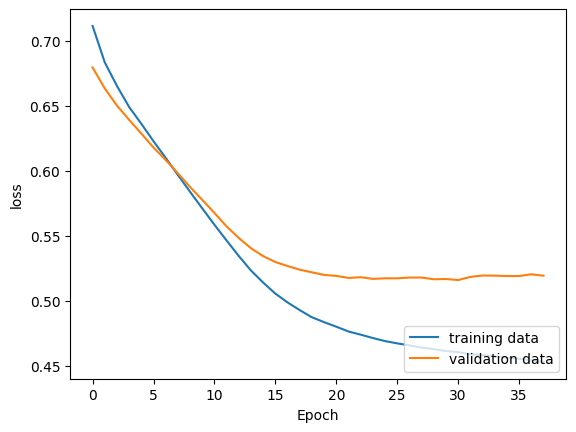

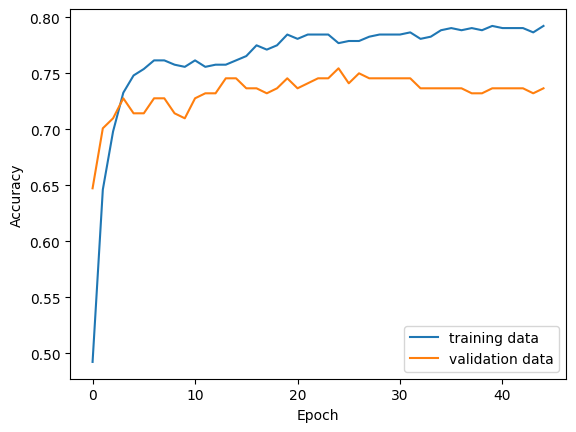

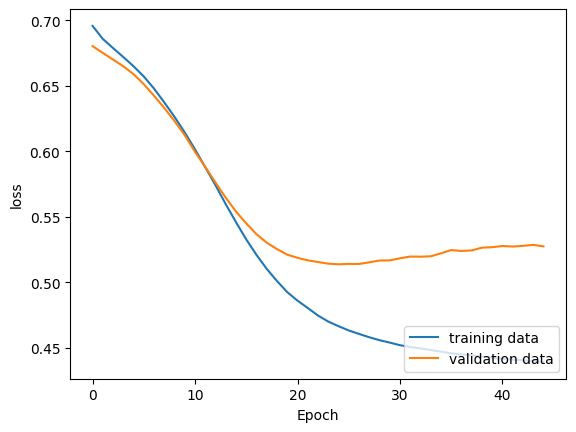

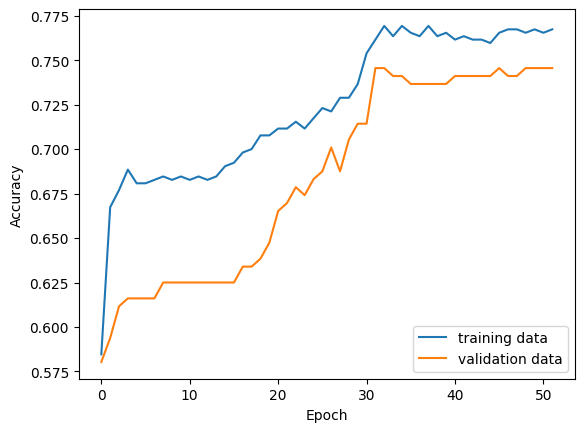

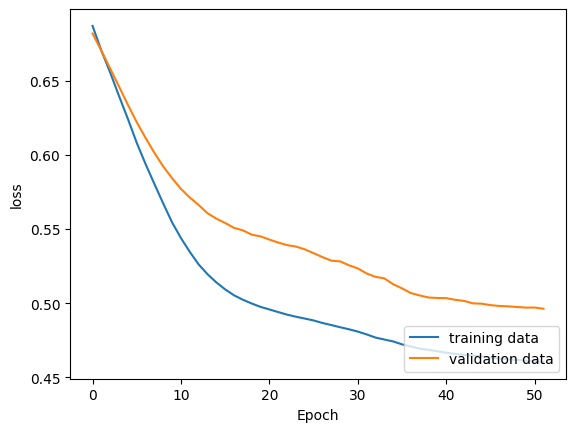

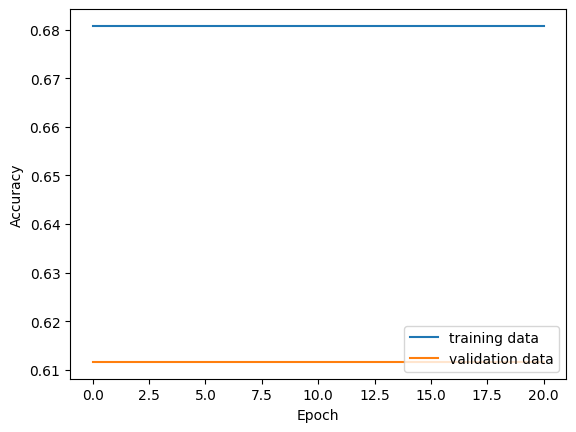

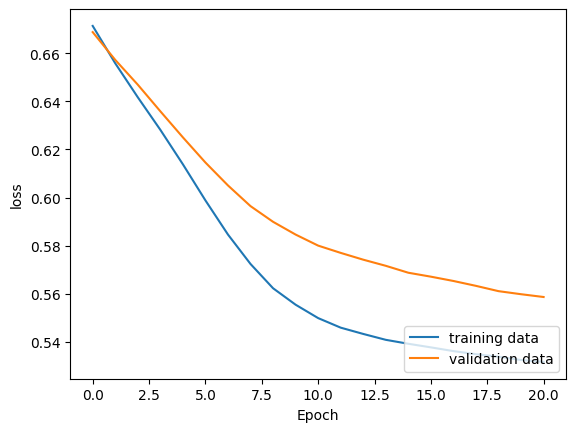

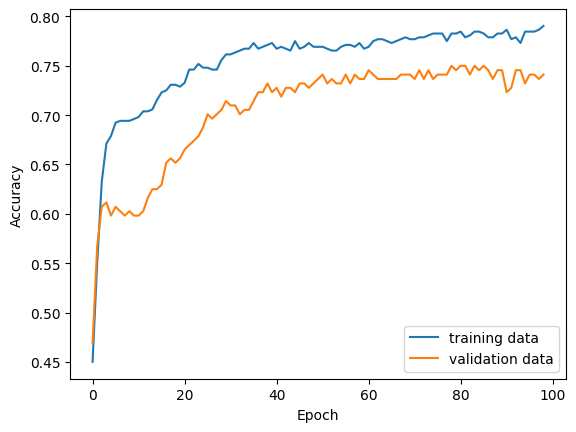

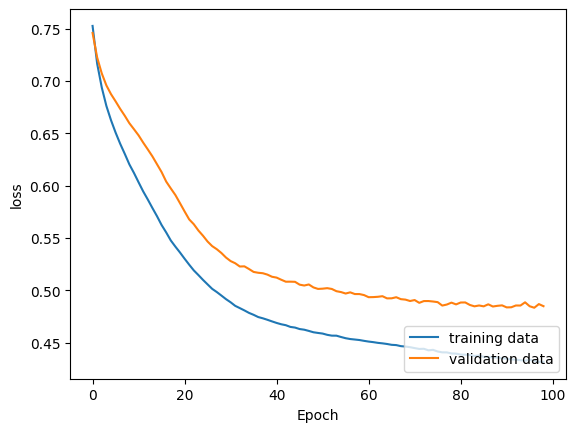

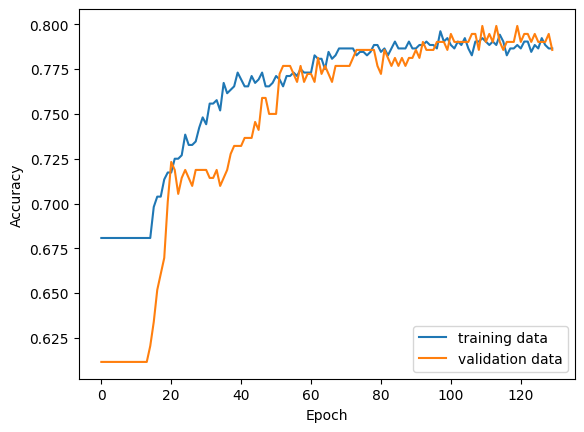

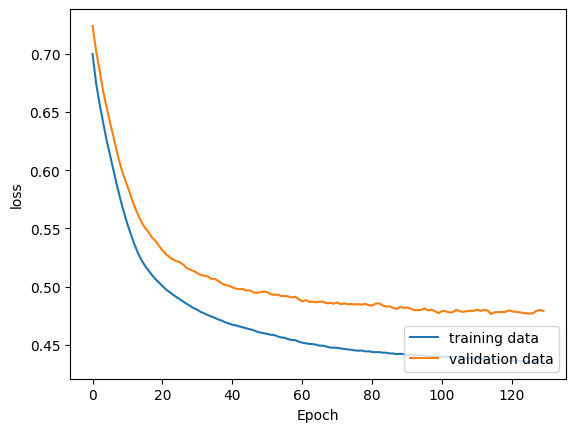

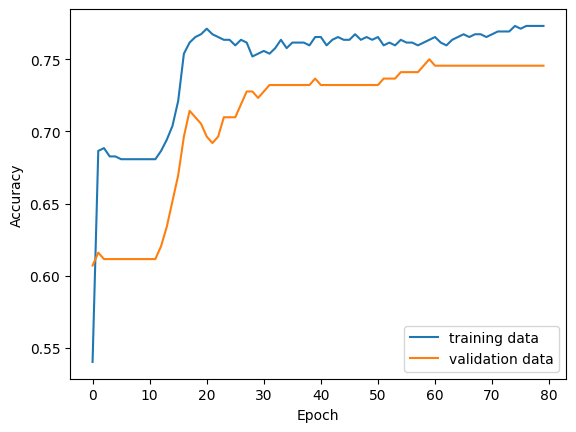

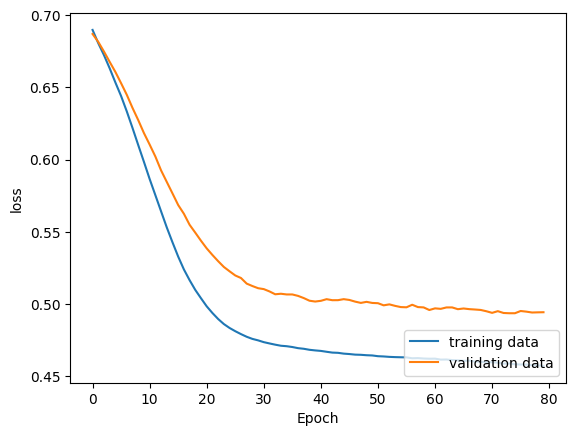

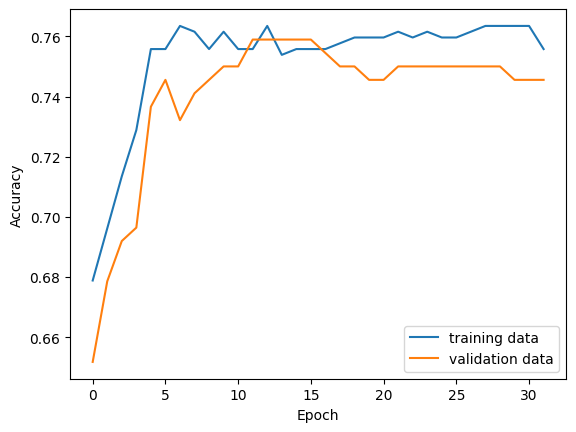

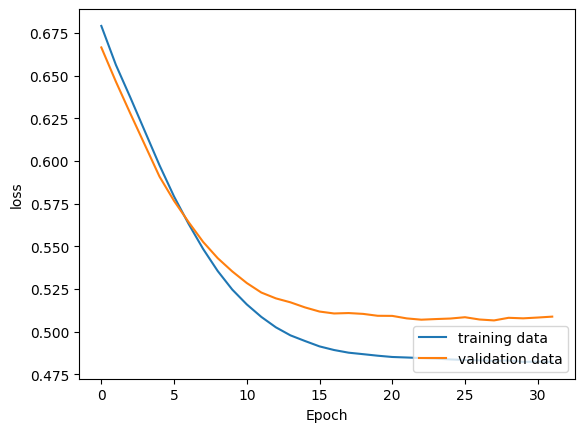

In [54]:
for k in histories:
  plt.plot(k.history['accuracy'])
  plt.plot(k.history['val_accuracy'])
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['training data', 'validation data'], loc='lower right')
  plt.show()
  plt.plot(k.history['loss'])
  plt.plot(k.history['val_loss'])
  plt.ylabel('loss')
  plt.xlabel('Epoch')
  plt.legend(['training data', 'validation data'], loc='lower right')
  plt.show()


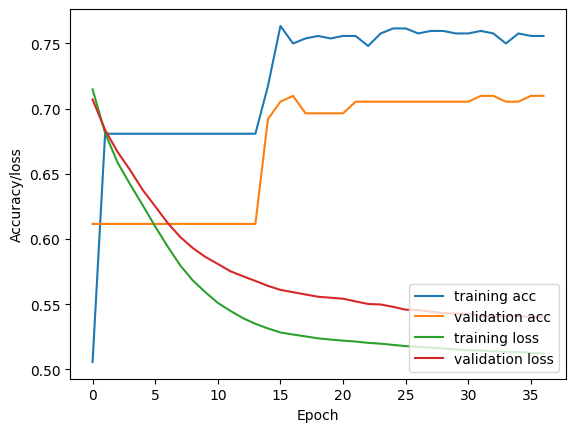

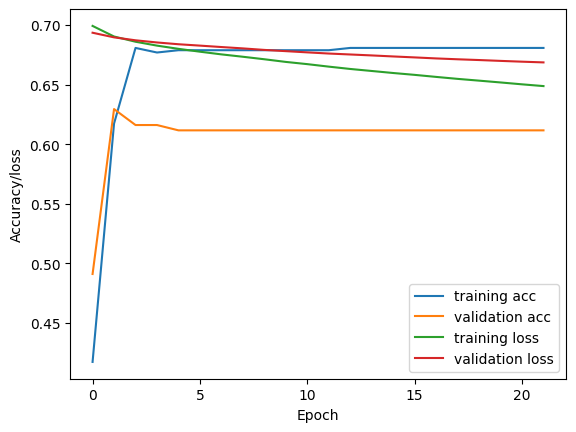

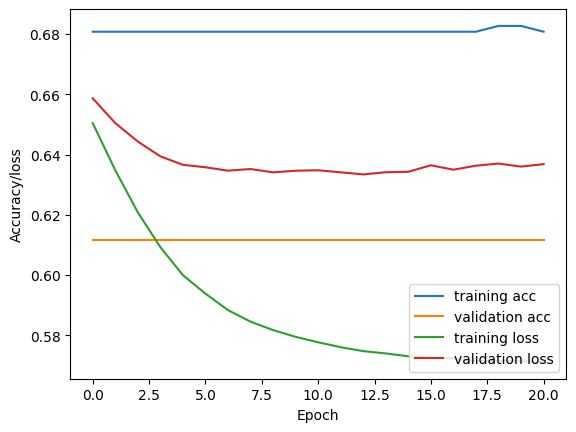

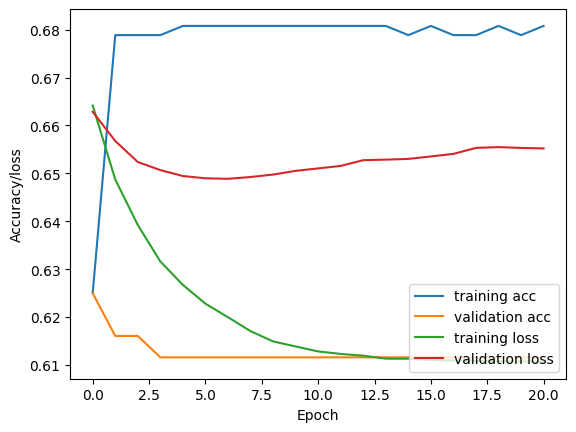

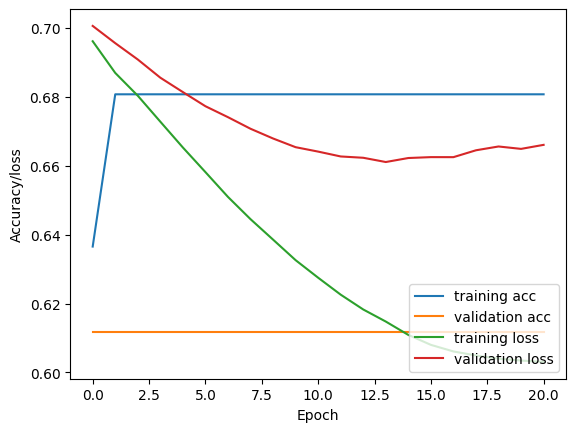

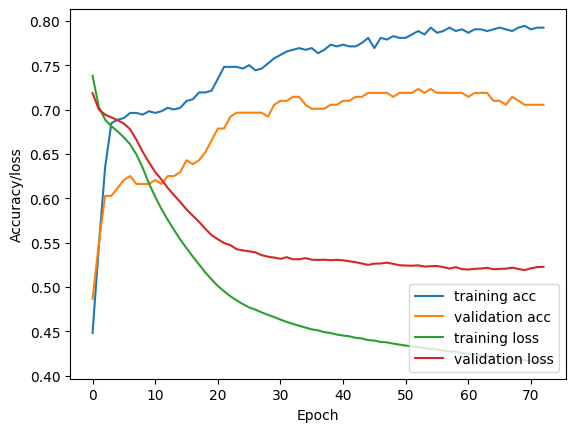

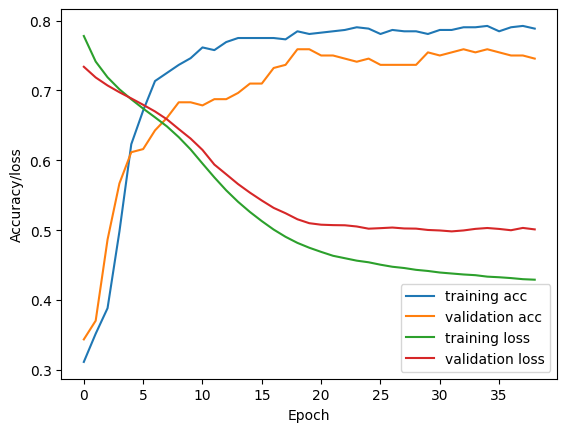

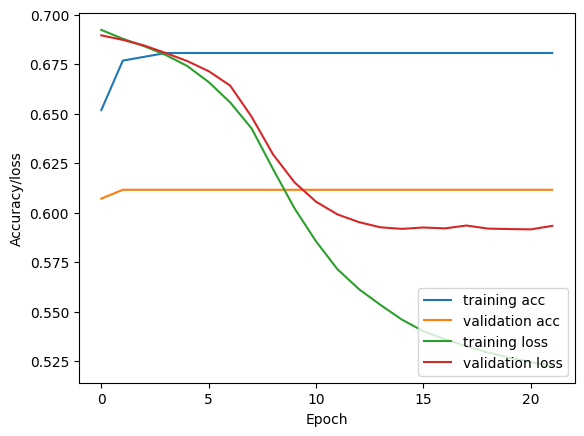

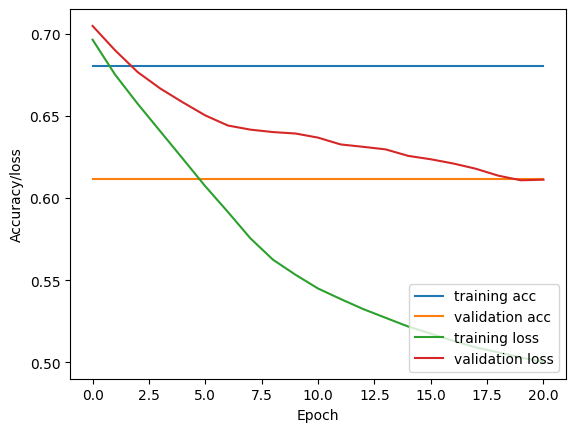

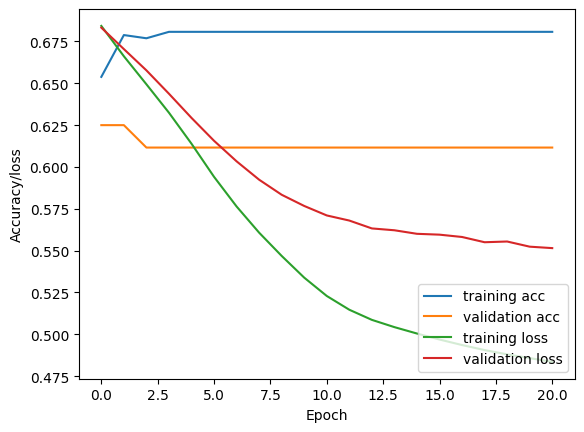

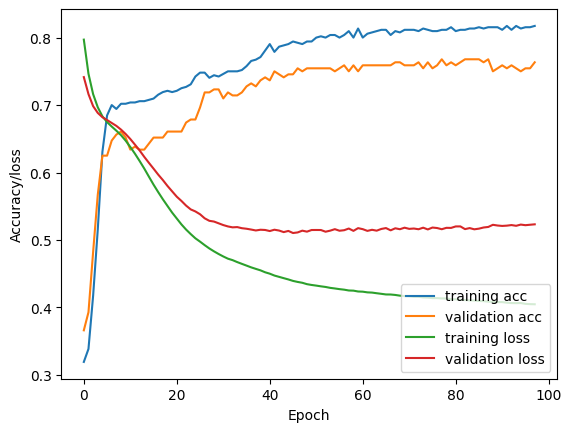

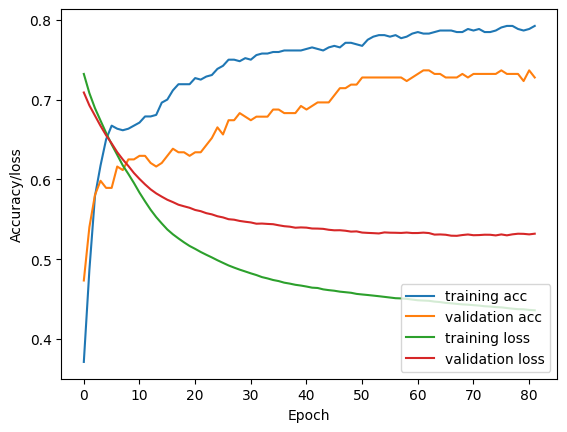

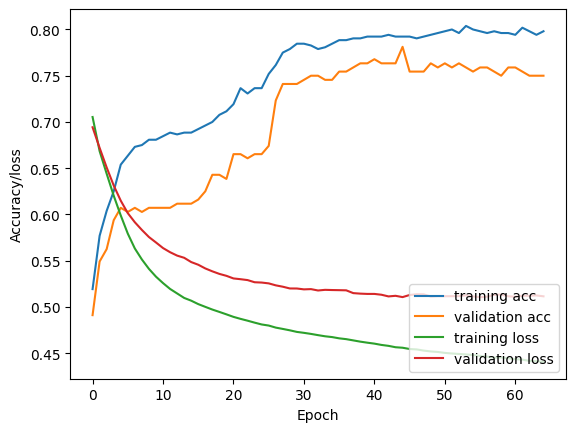

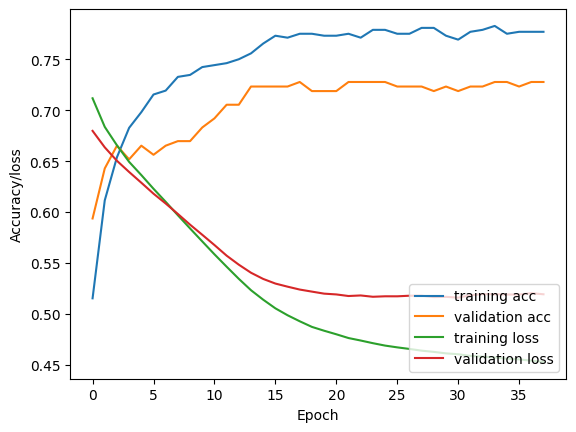

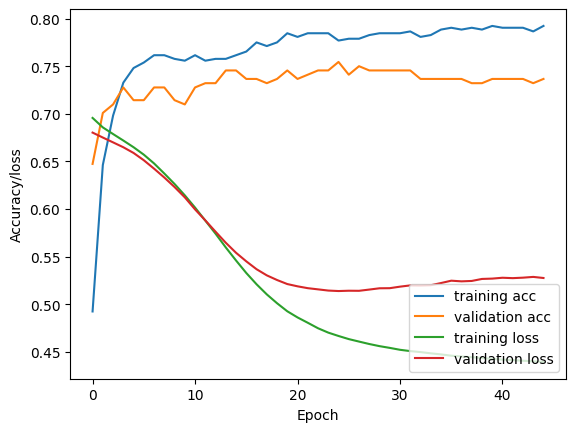

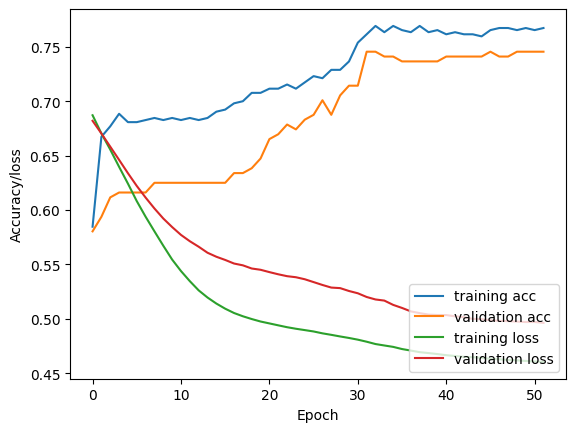

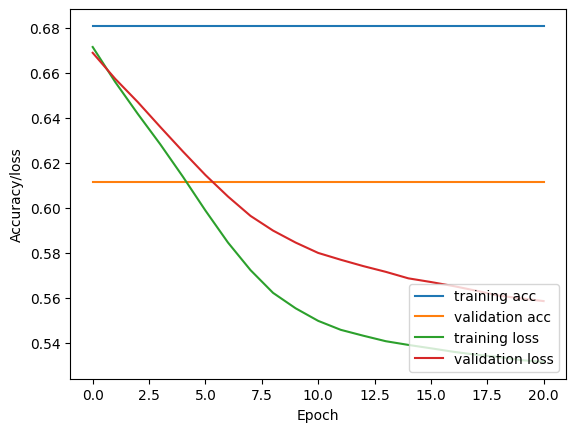

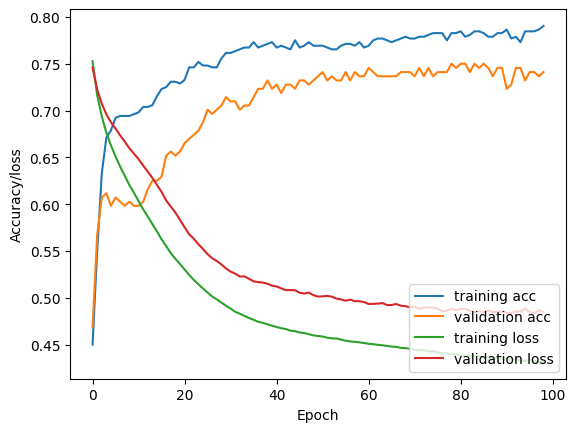

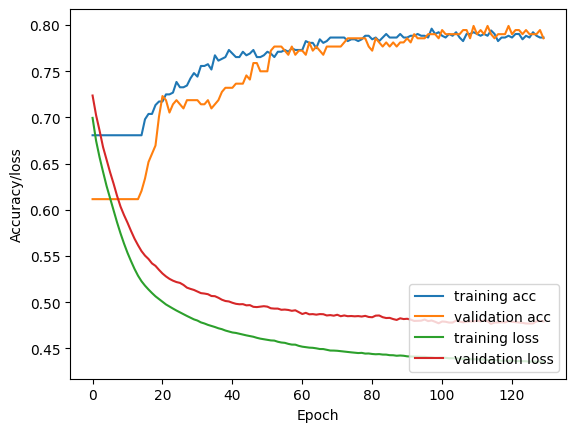

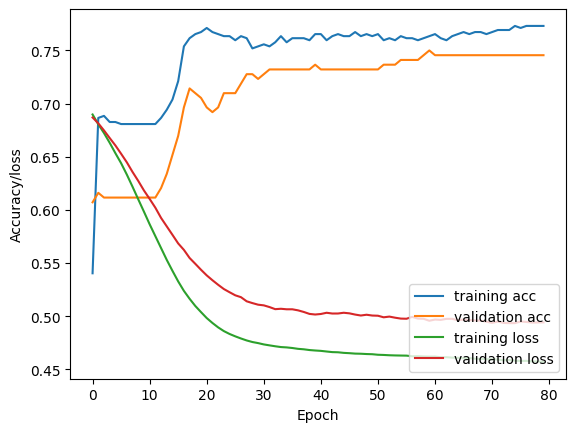

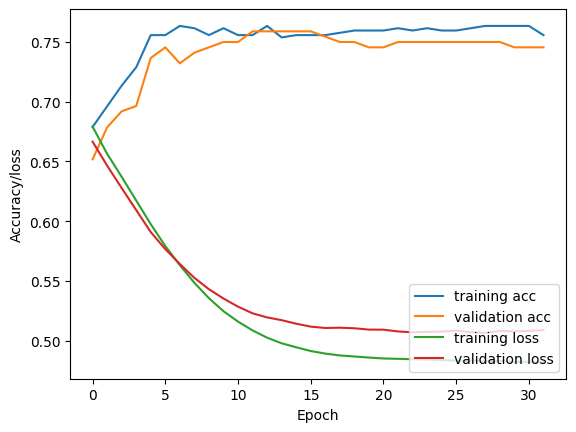

In [55]:
for k in histories:
  plt.plot(k.history['accuracy'])
  plt.plot(k.history['val_accuracy'])
  plt.plot(k.history['loss'])
  plt.plot(k.history['val_loss'])
  plt.ylabel('Accuracy/loss')
  plt.xlabel('Epoch')
  plt.legend(['training acc', 'validation acc', 'training loss', 'validation loss'], loc='lower right')
  plt.show()